# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable as stb

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
temp = pd.read_csv('Temp_States.csv')

#### Print `temp`

In [3]:
temp.head(3)

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [4]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 296.0+ bytes


#### Select the rows where state is New York

In [5]:
temp[temp['State'] == 'New York']

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [6]:
# opción 1

temp_NY1 = temp.groupby(['State'])['Temperature'].mean().loc['New York']

# opción 2
temp_NY2 = temp[temp['State'] == 'New York']['Temperature'].mean()
print(f"La temperatura media en New York es de {round(temp_NY2)} grados")

La temperatura media en New York es de 11 grados


#### We want to know cities and states with Temperature above 15 degress Celcius

In [7]:
temp15 = temp[temp['Temperature'] > 15]
temp15

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [8]:
temp15['City'].tolist()

['NYC', 'Hartford', 'Treton', 'Newark']

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [9]:
temp15_20 = temp[(temp['Temperature'] > 15) & (temp['Temperature'] < 20)]
temp15_20['City'].tolist()

['NYC', 'Hartford']

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [10]:
temp.groupby(['State'])['Temperature'].agg(['mean', 'std']).sort_values(by = 'mean', ascending = False)

,mean,std
State,,
New Jersey,21.111111,1.571348
Connecticut,15.833333,1.964186
New York,10.740741,8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [11]:
employee = pd.read_csv('employee.csv')

#### Explore the data types of the Temp dataframe. Comment your results

In [12]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 632.0+ bytes


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

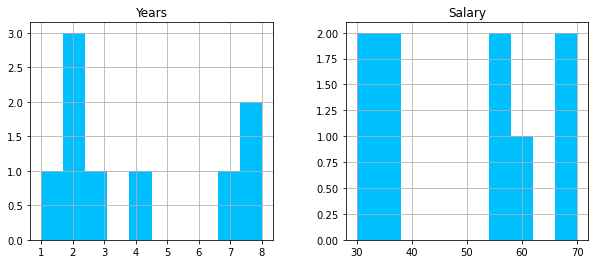

In [13]:
employee.hist(figsize=(10,4), color= 'deepskyblue');

Visualmente se denota que entre los empleados hay dos escalas salariales muy diferenciadas. Una primera que llega hasta aproximadamente los 40k y otra muy superior que aproximadamente va desde los 55k hasta los 70k.

#### What's the average salary in this company?

In [14]:
employee['Salary'].median()

55.0

#### What's the highest salary?

In [15]:
employee['Salary'].max()

70

#### What's the lowest salary?

In [16]:
employee['Salary'].min()

30

#### Who are the employees with the lowest salary?

In [17]:
employee[employee['Salary'] == employee['Salary'].min()]

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [18]:
employee[employee['Name'] == 'David']

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [19]:
employee[employee['Name'] == 'David'].iloc[0]['Salary']

30

#### Print all the rows where job title is associate

In [20]:
employee[employee['Title'] == 'associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [21]:
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [22]:
employee[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [23]:
employee[(employee['Title'] == 'associate') & (employee['Salary'] > 55)]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [24]:
employee.groupby(['Years'])['Salary'].mean().reset_index()

,Years,Salary
0,1,35.000000
1,2,38.333333
2,3,55.000000
3,4,35.000000
4,7,60.000000
5,8,70.000000


####  What is the average Salary per title?

In [25]:
employee.groupby(['Title'])['Salary'].mean().reset_index()

,Title,Salary
0,VP,70.000000
1,analyst,32.500000
2,associate,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

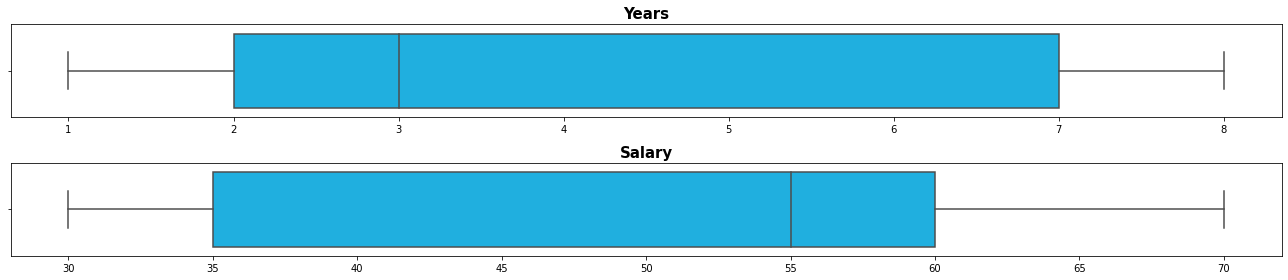

In [26]:

num_cols = employee.select_dtypes(include=np.number).columns

fig, ax = plt.subplots(len(num_cols), 1, figsize=(18,4))

for i in range(len(num_cols)):
    sns.boxplot(x= num_cols[i], data= employee, color= 'deepskyblue', ax= ax[i]).set_title(num_cols[i], fontsize = 15, fontweight = "bold")
    ax[i].set_xlabel("")
    
fig.tight_layout();

El 25 % de los empleados no supera los dos años de antiguedad en la empresa.  Cabe destacar que en la empresa el 50% de sus empleados disponen de una antiguedad igual o menor de tres años.

En lo que respecta a los salarios de la compañía, más del 25 % de la plantilla supera los 35k. Si hablamos del último cuartil podemos ver como solo el 25% de los empleados cobra entre 60-70k.

#### Is the mean salary per gender different?

,Gender,Salary
0,F,47.5
1,M,50.0


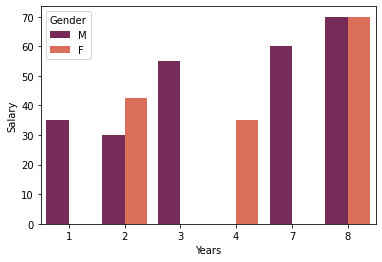

In [27]:
sns.barplot(data= employee, x='Years', y='Salary',hue= 'Gender', ci= None, palette = "rocket");
employee.groupby(['Gender'])['Salary'].mean().reset_index()

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [28]:
employee.groupby(['Department'])[['Years', 'Salary']].agg(['min', 'mean', 'max'])

Years               Salary           
             min      mean max    min   mean max
Department                                      
HR             2  4.666667   8     30  45.00  70
IT             1  4.500000   8     30  48.75  70
Sales          2  2.500000   3     55  55.00  55

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [29]:
employee.groupby(['Department'])['Salary'].agg([lambda x: x.max() - x.min()]).rename({"<lambda>": 'max-min'}, axis=1)

,max-min
Department,
HR,40
IT,40
Sales,0


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [30]:
orders = pd.read_csv('Orders.csv', index_col= 0)

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [31]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   InvoiceNo     397924 non-null  int64  
 1   StockCode     397924 non-null  object 
 2   year          397924 non-null  int64  
 3   month         397924 non-null  int64  
 4   day           397924 non-null  int64  
 5   hour          397924 non-null  int64  
 6   Description   397924 non-null  object 
 7   Quantity      397924 non-null  int64  
 8   InvoiceDate   397924 non-null  object 
 9   UnitPrice     397924 non-null  float64
 10  CustomerID    397924 non-null  int64  
 11  Country       397924 non-null  object 
 12  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(7), object(4)
memory usage: 42.5+ MB


In [32]:
orders.describe().T

,count,mean,std,min,25%,50%,75%,max
InvoiceNo,397924.0,560617.126645,13106.167695,536365.0,549234.00,561893.00,572090.00,581587.00
year,397924.0,2010.934259,0.247829,2010.0,2011.00,2011.00,2011.00,2011.00
month,397924.0,7.612537,3.416527,1.0,5.00,8.00,11.00,12.00
day,397924.0,3.614555,1.928274,1.0,2.00,3.00,5.00,7.00
hour,397924.0,12.728247,2.273535,6.0,11.00,13.00,14.00,20.00
Quantity,397924.0,13.021823,180.420210,1.0,2.00,6.00,12.00,80995.00
UnitPrice,397924.0,3.116174,22.096788,0.0,1.25,1.95,3.75,8142.75
CustomerID,397924.0,15294.315171,1713.169877,12346.0,13969.00,15159.00,16795.00,18287.00
amount_spent,397924.0,22.394749,309.055588,0.0,4.68,11.80,19.80,168469.60


####  What is the average Purchase Price?

In [33]:
orders['amount_spent'].mean()

22.394748504739596

#### What were the highest and lowest purchase prices? 

In [34]:
print("Compra más elevada:", orders['amount_spent'].max())

Compra más elevada: 168469.6


In [35]:
print("Compra con menor importe:", orders['amount_spent'].min())

Compra con menor importe: 0.0


#### Select all the customers we have in Spain

In [36]:
customers_spain = orders[orders['Country'] == 'Spain']['CustomerID'].unique().tolist()
print("Listado de clientes en España:", customers_spain)

Listado de clientes en España: [12557, 17097, 12540, 12551, 12484, 12539, 12510, 12421, 12502, 12462, 12507, 12541, 12547, 12597, 12545, 12596, 12354, 12417, 12455, 12450, 12548, 12556, 12550, 12546, 12454, 12448, 12544, 12538, 12445, 12442]


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [37]:
print(f'En España hay {len(customers_spain)} clientes')

En España hay 30 clientes


#### Select all the customers who have bought more than 50 items ?

In [38]:
mas50 = orders[orders['Quantity'] > 50]
mas50[:3]

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
46,536371,22086,2010,12,3,9,paper chain kit 50's christmas,80,2010-12-01 09:00:00,2.55,13748,United Kingdom,204.0
83,536376,21733,2010,12,3,9,red hanging heart t-light holder,64,2010-12-01 09:32:00,2.55,15291,United Kingdom,163.2
96,536378,21212,2010,12,3,9,pack of 72 retrospot cake cases,120,2010-12-01 09:37:00,0.42,14688,United Kingdom,50.4


#### Select orders from Spain that are above 50 items

In [39]:
mas50_sp = mas50[mas50['Country'] == 'Spain']['InvoiceNo'].tolist()
print(mas50_sp)

[536944, 536944, 536944, 536944, 536944, 540785, 540785, 540785, 540785, 547972, 547972, 547972, 558871, 558871, 558871, 558871, 558871, 558871, 558871, 558871, 561669, 561669, 561669, 561669, 561669, 564734, 567968, 571255, 571255, 571255, 571255, 571851, 573362, 573362, 573362, 578321, 578321, 578321, 578321]


#### Select all free orders

In [40]:
invoice_0 = orders[orders['amount_spent'] == 0]['InvoiceNo'].tolist()
print(invoice_0)

[537197, 539263, 539722, 540372, 540372, 541109, 543599, 547417, 548318, 548871, 550188, 553000, 554037, 561284, 561669, 561916, 562973, 564651, 564651, 564651, 564651, 568158, 568384, 569716, 571035, 572893, 574138, 574175, 574252, 574469, 574879, 574920, 574920, 575579, 575579, 577129, 577168, 577314, 577696, 578841]


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [41]:
fil_lb = orders[orders['Description'].str.contains('lunch bag')]
fil_lb[:3]

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [42]:
lb_2011 = fil_lb[fil_lb['year'] == 2011]
lb_2011[:3]

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.5
42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.5
42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.3


#### Show the frequency distribution of the amount spent in Spain.

<AxesSubplot:xlabel='amount_spent', ylabel='Count'>

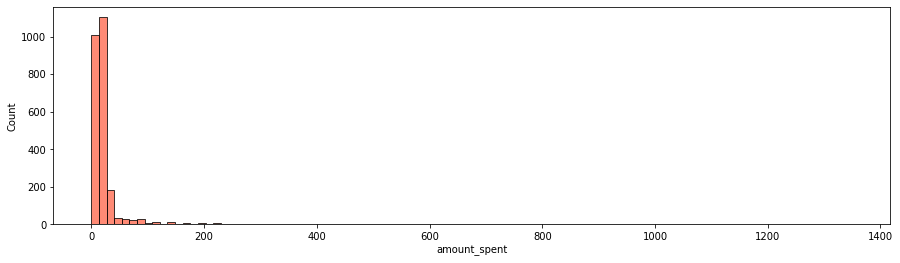

In [43]:
fil_spain = orders[orders['Country'] == 'Spain']
plt.figure(figsize=(15,4))
sns.histplot(data = fil_spain, x = fil_spain['amount_spent'], kde = False, color = 'tomato', bins = 100)

#### Select all orders made in the month of August

In [44]:
or_aug = orders[orders['month'] == 8]
or_aug[:3]

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [45]:
or_aug.stb.freq(['Country'])

,Country,count,percent,cumulative_count,cumulative_percent
0,United Kingdom,23105,85.532892,23105,85.532892
1,Germany,795,2.943027,23900,88.475919
2,EIRE,593,2.195239,24493,90.671158
3,France,569,2.106393,25062,92.777552
4,Netherlands,280,1.036538,25342,93.814090
5,Switzerland,267,0.988413,25609,94.802502
6,Spain,252,0.932884,25861,95.735387
7,Belgium,194,0.718173,26055,96.453559
8,Israel,171,0.633029,26226,97.086588
9,Channel Islands,140,0.518269,26366,97.604857


#### What's the  average amount of money spent by country

In [46]:
orders.groupby(['Country'])['amount_spent'].mean().reset_index().sort_values(by= 'amount_spent', ascending=False)

,Country,amount_spent
23,Netherlands,120.798282
0,Australia,116.895620
19,Japan,116.561900
29,Singapore,95.852658
31,Sweden,85.096075
9,Denmark,49.882474
21,Lithuania,47.458857
20,Lebanon,37.641778
10,EIRE,36.687745
4,Brazil,35.737500


#### What's the most expensive item?

In [47]:
orders[['Description','UnitPrice']].max()[0]

'zinc wire sweetheart letter tray'

#### What was the average amount spent per year ?

In [48]:
orders.groupby(['year'])['amount_spent'].mean().reset_index()

,year,amount_spent
0,2010,21.892733
1,2011,22.430074
